#### Description
Context
This dataset is a playground for fundamental and technical analysis. It is said that 30% of traffic on stocks is already generated by machines, can trading be fully automated? If not, there is still a lot to learn from historical data. 

Content
Dataset consists of following files:

Fundamentals.csv: metrics extracted from annual SEC 10K fillings (2012-2016), should be enough to derive most of popular fundamental indicators



In [29]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [24]:
#importing the file
pd.set_option('display.max_columns', None)
nyc_data=pd.read_csv("fundamentals.csv")


In [38]:
nyc_data.shape

(1781, 79)

In [63]:
#nyc_data.set_index("For Year")
#t=nyc_data.groupby("For Year", sort=False)
#t.describe()
#nyc_data[nyc_data["For Year"] >1215]
nyc_data=nyc_data[nyc_data["For Year"]!=1215]

In [6]:
nyc_data

Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
For Year                                                             
2012.0             0           AAL    2012-12-31      3.068000e+09   
2013.0             1           AAL    2013-12-31      4.975000e+09   
2014.0             2           AAL    2014-12-31      4.668000e+09   
2015.0             3           AAL    2015-12-31      5.102000e+09   
2012.0             4           AAP    2012-12-29      2.409453e+09   
...              ...           ...           ...               ...   
2015.0          1776          ZION    2015-12-31      0.000000e+00   
2013.0          1777           ZTS    2013-12-31      1.381000e+09   
2014.0          1778           ZTS    2014-12-31      1.071000e+09   
2015.0          1779           ZTS    2015-12-31      1.313000e+09   
NaN             1780           ZTS    2016-12-31      1.076000e+09   

          Accounts Receivable  Add'l income/expense items  After Tax ROE  \
For Year                                                                   
2012.0           -222000000.0               -1.961000e+09           23.0   
2013.0            -93000000.0               -2.723000e+09           67.0   
2014.0           -160000000.0               -1.500000e+08          143.0   
2015.0            352000000.0               -7.080000e+08          135.0   
2012.0            -89482000.0                6.000000e+05           32.0   
...                       ...                         ...            ...   
2015.0                    0.0               -2.530000e+06            4.0   
2013.0            -99000000.0                9.000000e+06           54.0   
2014.0             69000000.0               -7.000000e+06           44.0   
2015.0            -58000000.0               -8.100000e+07           32.0   
NaN                15000000.0                2.000000e+06           55.0   

          Capital Expenditures  Capital Surplus  Cash Ratio  \
For Year                                                      
2012.0           -1.888000e+09     4.695000e+09        53.0   
2013.0           -3.114000e+09     1.059200e+10        75.0   
2014.0           -5.311000e+09     1.513500e+10        60.0   
2015.0           -6.151000e+09     1.159100e+10        51.0   
2012.0           -2.711820e+08     5.202150e+08        23.0   
...                        ...              ...         ...   
2015.0           -1.573610e+08     0.000000e+00         NaN   
2013.0           -1.840000e+08     8.780000e+08        43.0   
2014.0           -1.800000e+08     9.580000e+08        81.0   
2015.0           -2.240000e+08     1.012000e+09        65.0   
NaN              -2.160000e+08     1.024000e+09        65.0   

          Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
For Year                                                                     
2012.0                 1.330000e+09                     0.0   1.270000e+08   
2013.0                 2.175000e+09                     0.0   5.000000e+06   
2014.0                 1.768000e+09                     0.0   7.000000e+06   
2015.0                 1.085000e+09                     0.0   6.000000e+06   
2012.0                 5.981110e+08            -260298000.0   7.000000e+03   
...                             ...                     ...            ...   
2015.0                 1.576313e+10                     0.0   4.766731e+09   
2013.0                 6.100000e+08            -178000000.0   5.000000e+06   
2014.0                 8.820000e+08            -110000000.0   5.000000e+06   
2015.0                 1.154000e+09            -262000000.0   5.000000e+06   
NaN                    7.270000e+08            -101000000.0   5.000000e+06   

          Cost of Revenue  Current Ratio  Deferred Asset Charges  \
For Year                                                           
2012.0       1.049900e+10           78.0            0.000000e+00   
2013.0       1.101900e+10          104.0            0.000000e+00   
201

In [7]:
nyc_data.dtypes

Unnamed: 0                        int64
Ticker Symbol                    object
Period Ending                    object
Accounts Payable                float64
Accounts Receivable             float64
                                 ...   
Total Liabilities & Equity      float64
Total Revenue                   float64
Treasury Stock                  float64
Earnings Per Share              float64
Estimated Shares Outstanding    float64
Length: 78, dtype: object

In [8]:
nyc_data.shape

(1780, 78)

In [70]:
prev_count=nyc_data.shape[0]
prev_count

1780

In [71]:
# descriptive statistics for the dataset
nyc_data.describe()

Unnamed: 0  Accounts Payable  Accounts Receivable  \
count  1780.000000      1.780000e+03         1.780000e+03   
mean    890.020225      4.671868e+09        -6.330430e+07   
std     514.418544      1.406427e+10         7.564294e+08   
min       0.000000      0.000000e+00        -6.452000e+09   
25%     444.750000      5.158750e+08        -1.040000e+08   
50%     890.500000      1.333929e+09        -1.829250e+07   
75%    1335.250000      3.238500e+09         7.837000e+06   
max    1780.000000      2.069390e+11         2.266400e+10   

       Add'l income/expense items  After Tax ROE  Capital Expenditures  \
count                1.780000e+03    1780.000000          1.780000e+03   
mean                 6.914164e+07      43.612921         -1.252537e+09   
std                  6.850032e+08     233.989255          2.980688e+09   
min                 -6.768000e+09       0.000000         -3.798500e+10   
25%                 -2.632000e+06      10.000000         -1.151650e+09   
50%                  2.000000e+06      16.000000         -3.580000e+08   
75%                  3.369400e+07      26.000000         -1.290750e+08   
max                  1.416200e+10    5789.000000          5.000000e+06   

       Capital Surplus   Cash Ratio  Cash and Cash Equivalents  \
count     1.780000e+03  1481.000000               1.780000e+03   
mean      5.354002e+09    74.494261               8.525342e+09   
std       1.134257e+10   102.323131               5.433606e+10   
min      -7.215000e+08     0.000000               2.100000e+04   
25%       4.783795e+08    17.000000               3.083500e+08   
50%       2.009040e+09    41.000000               8.622950e+08   
75%       5.743500e+09    90.000000               2.312250e+09   
max       1.082880e+11  1041.000000               7.281110e+11   

       Changes in Inventories  Common Stocks  Cost of Revenue  Current Ratio  \
count            1.780000e+03   1.780000e+03     1.780000e+03    1481.000000   
mean            -6.791562e+07   1.609424e+09     1.235907e+10     186.829169   
std              3.904433e+08   9.180139e+09     3.042133e+10     128.090645   
min             -5.562000e+09   0.000000e+00     0.000000e+00      17.000000   
25%             -5.400000e+07   1.628000e+06     1.195136e+09     109.000000   
50%              0.000000e+00   7.724500e+06     3.704500e+09     152.000000   
75%              0.000000e+00   2.970000e+08     9.803200e+09     226.000000   
max              3.755000e+09   1.581420e+11     3.650860e+11    1197.000000   

       Deferred Asset Charges  Deferred Liability Charges  Depreciation  \
count            1.780000e+03                1.780000e+03  1.780000e+03   
mean             5.910056e+08                1.611413e+09  1.084717e+09   
std              2.667479e+09                4.549827e+09  2.188822e+09   
min              0.000000e+00                0.000000e+00 -4.480000e+08   
25%              0.000000e+00                0.000000e+00  1.797255e+08   
50%              0.000000e+00                2.058340e+08  4.284615e+08   
75%              1.461935e+08                1.087490e+09  1.047000e+09   
max              3.686000e+10                5.618100e+10  2.951700e+10   

       Earnings Before Interest and Tax  Earnings Before Tax  \
count                      1.780000e+03         1.780000e+03   
mean                       2.711148e+09         2.376239e+09   
std                        6.146913e+09         5.722272e+09   
min                       -2.792700e+10        -2.822600e+10   
25%                        5.844472e+08         4.898695e+08   
50%                        1.139600e+09         9.605585e+08   
75%                        2.586250e+09         2.257500e+09   
max                        7.905300e+10         7.872600e+10   

       Effect of Exchange Rate  \
count             1.780000e+03   
mean             -3.842491e+07   
std               1.626953e+08   
min              -3.067000e+09   
25%              -2.000000e+07   
50%              -

### Data Cleaning

###### Checking for missing values

In [73]:
nyc_data.dropna(inplace=True)
nyc_data.count()[1]

1298

In [74]:
missing_count= prev_count-nyc_data.count()
missing_count[0]

482

In [75]:
#Dropping Duplicates
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)
nyc_data.drop_duplicates()
nyc_data

Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0              0           AAL    2012-12-31      3.068000e+09   
1              1           AAL    2013-12-31      4.975000e+09   
2              2           AAL    2014-12-31      4.668000e+09   
3              3           AAL    2015-12-31      5.102000e+09   
4              4           AAP    2012-12-29      2.409453e+09   
5              5           AAP    2013-12-28      2.609239e+09   
6              6           AAP    2015-01-03      3.616038e+09   
7              7           AAP    2016-01-02      3.757085e+09   
8              8          AAPL    2013-09-28      3.622300e+10   
9              9          AAPL    2014-09-27      4.864900e+10   
10            10          AAPL    2015-09-26      6.067100e+10   
11            11          AAPL    2016-09-24      5.932100e+10   
13            13          ABBV    2013-12-31      6.448000e+09   
14            14          ABBV    2014-12-31      6.954000e+09   
15            15          ABBV    2015-12-31      8.463000e+09   
16            16           ABC    2013-09-30      1.487064e+10   
17            17           ABC    2014-09-30      1.725016e+10   
18            18           ABC    2015-09-30      2.157823e+10   
19            19           ABC    2016-09-30      2.467016e+10   
20            20           ABT    2012-12-31      1.088900e+10   
21            21           ABT    2013-12-31      5.948000e+09   
22            22           ABT    2014-12-31      5.350000e+09   
23            23           ABT    2015-12-31      5.683000e+09   
24            24          ADBE    2013-11-29      7.292570e+08   
25            25          ADBE    2014-11-28      7.761630e+08   
26            26          ADBE    2015-11-27      7.793560e+08   
28            28           ADI    2013-11-02      3.230840e+08   
29            29           ADI    2014-11-01      4.306210e+08   
30            30           ADI    2015-10-31      4.389040e+08   
31            31           ADI    2016-10-29      4.313960e+08   
33            33           ADM    2013-12-31      1.413500e+10   
34            34           ADM    2014-12-31      1.524000e+10   
35            35           ADM    2015-12-31      1.340700e+10   
36            36           ADS    2012-12-31      4.900950e+08   
37            37           ADS    2013-12-31      4.723260e+08   
38            38           ADS    2014-12-31      9.140580e+08   
39            39           ADS    2015-12-31      1.010619e+09   
40            40          ADSK    2013-01-31      3.967000e+08   
41            41          ADSK    2014-01-31      3.753000e+08   
42            42          ADSK    2015-01-31      4.993000e+08   
43            43          ADSK    2016-01-31      5.221000e+08   
44            44           AEE    2012-12-31      6.710000e+08   
45            45           AEE    2013-12-31      9.470000e+08   
46            46           AEE    2014-12-31      8.420000e+08   
47            47           AEE    2015-12-31      9.090000e+08   
48            48           AEP    2012-12-31      2.185000e+09   
49            49           AEP    2013-12-31      2.333000e+09   
50            50           AEP    2014-12-31      2.360000e+09   
72            72          AKAM    2012-12-31      1.763780e+08   
73            73          AKAM    2013-12-31      2.240950e+08   
74            74          AKAM    2014-12-31      2.820980e+08   
75            75          AKAM    2015-12-31      2.781480e+08   
76            76           ALB    2012-12-31      3.723090e+08   
77            77           ALB    2013-12-31      4.118090e+08   
78            78           ALB    2014-12-31      4.287900e+08   
79            79           ALB    2015-12-31      8.106340e+08   
80            80           ALK    2012-12-31      8.060000e+08   
81            81           ALK    2013-12-31      8.990000e+08   
82            82           ALK    2014-12-31      9.230000e+08   
83            83           ALK    2015-12-31  

### Data Visualization

In [15]:
nyc_data.groupby("For Year", sort=False).describe()

Unnamed: 0                                                        \
              count        mean         std   min     25%    50%      75%   
For Year                                                                    
2012.0        186.0  941.569892  509.443404   0.0  538.75  953.0  1373.00   
2013.0        345.0  893.205797  505.144805   1.0  476.00  888.0  1331.00   
2014.0        345.0  888.600000  508.428618   2.0  462.00  876.0  1326.00   
2015.0        342.0  900.786550  511.121541   3.0  480.25  907.0  1335.25   
2016.0         80.0  893.275000  511.937125  11.0  401.00  892.0  1358.00   

                 Accounts Payable                                           \
             max            count          mean           std          min   
For Year                                                                     
2012.0    1769.0            186.0  2.953347e+09  6.065135e+09   89613000.0   
2013.0    1777.0            345.0  3.729379e+09  7.334110e+09   71990000.0   
2014.0    1778.0            345.0  3.842348e+09  7.396250e+09   86794000.0   
2015.0    1779.0            342.0  3.712965e+09  7.556649e+09  103342000.0   
2016.0    1744.0             80.0  4.753098e+09  1.036246e+10  106517000.0   

                                                                 \
                  25%           50%           75%           max   
For Year                                                          
2012.0    563490000.0  1.212150e+09  2.616009e+09  6.048600e+10   
2013.0    624400000.0  1.429700e+09  3.382000e+09  5.909900e+10   
2014.0    698000000.0  1.464000e+09  3.499000e+09  5.717400e+10   
2015.0    660571500.0  1.363400e+09  3.165069e+09  6.067100e+10   
2016.0    601738750.0  1.330000e+09  3.837000e+09  5.932100e+10   

         Accounts Receivable                                            \
                       count          mean           std           min   
For Year                                                                 
2012.0                 186.0 -4.411060e+07  2.990580e+08 -2.230000e+09   
2013.0                 345.0 -1.113233e+08  4.318317e+08 -4.395000e+09   
2014.0                 345.0 -9.838516e+07  6.119027e+08 -6.452000e+09   
2015.0                 342.0 -2.790091e+07  6.465149e+08 -4.489900e+09   
2016.0                  80.0 -6.373894e+07  3.804926e+08 -1.957000e+09   

                                                             \
                  25%         50%         75%           max   
For Year                                                      
2012.0    -63259250.0  -8750000.0  25000000.0  8.510000e+08   
2013.0   -116080000.0 -40009000.0         0.0  1.014000e+09   
2014.0   -113400000.0 -28066000.0   7492000.0  3.118000e+09   
2015.0    -79275000.0  -7934500.0  46875000.0  4.692000e+09   
2016.0    -97323250.0 -20950000.0  37011500.0  1.044000e+09   

         Add'l income/expense items                                            \
                              count          mean           std           min   
For Year                                                                        
2012.0                        186.0  1.189004e+08  1.209874e+09 -4.022000e+09   
2013.0                        345.0  5.723319e+07  3.584089e+08 -2.723000e+09   
2014.0                        345.0  1.341262e+08  9.869780e+08 -4.577000e+09   
2015.0                        342.0  6.202632e+07  4.963310e+08 -2.860000e+09   
2016.0                         80.0  6.981011e+07  3.712601e+08 -6.130000e+08   

                                                         After Tax ROE  \
                25%        50%         75%           max         count   
For Year                                                                 
2012.0   -2072000.0  4111500.0  41750000.0  1.416200e+10         186.0   
2013.0   -5568000.0  3300000.0  31400000.0  3.492000e+09         345.0   
2014.0   -2230000.0  4300000.0  43100000.0  1.161300e+10         345.0   
2015.0   -7421500.0  3670000.0  3919825

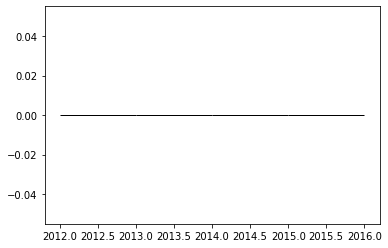

In [68]:


plt.show()


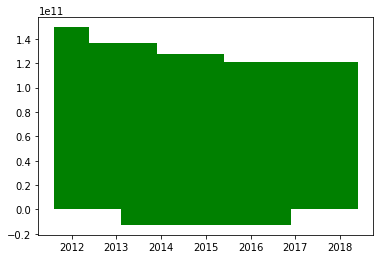

In [35]:
plt.bar(nyc_data["For Year"],nyc_data["Gross Profit"] ,color="green")
plt.show()

In [22]:
nyc_data.columns

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

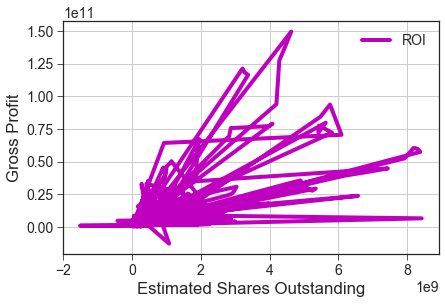

In [137]:
plt.style.use('seaborn-ticks')
x=nyc_data['Estimated Shares Outstanding']
y=nyc_data["Gross Profit"]
plt.plot(x,y, color='m', linestyle='-' ,label = "ROI")

plt.xlabel('Estimated Shares Outstanding')
plt.ylabel("Gross Profit")
plt.grid(True)
plt.legend()
plt.savefig('plt.png')
plt.show()

Text(0, 0.5, 'Gross Profit')

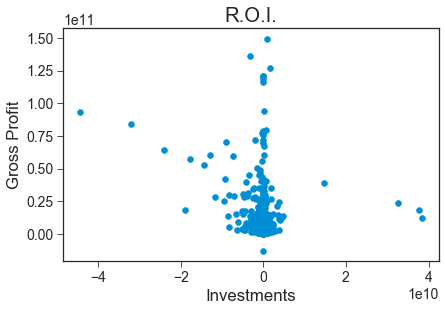

In [134]:
plt.scatter(nyc_data["Investments"],nyc_data["Gross Profit"] )
plt.title("R.O.I.")

plt.xlabel("Investments")
plt.ylabel("Gross Profit")

Text(0, 0.5, 'Gross Profit')

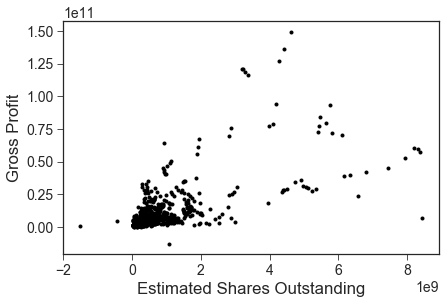

In [141]:
plt.plot(x,y, "k." ,label = "ROI")

plt.xlabel('Estimated Shares Outstanding')
plt.ylabel("Gross Profit")


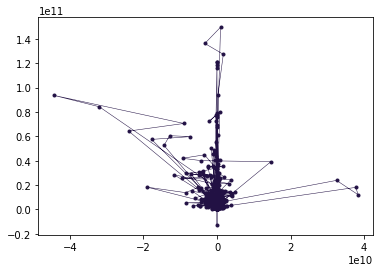

In [83]:
plt.plot(x,y, color='#221144', linestyle='-', linewidth=0.5, marker ='.' ,label = "ROI")


Text(0, 0.5, 'Gross Profit')

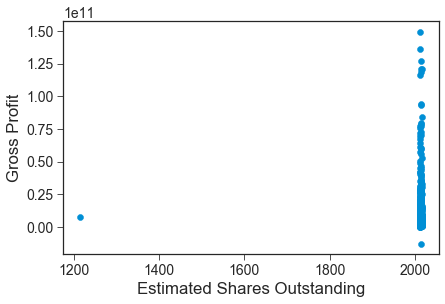

In [148]:
plt.scatter(nyc_data["For Year"],nyc_data["Gross Profit"])

plt.xlabel('Estimated Shares Outstanding')
plt.ylabel("Gross Profit")


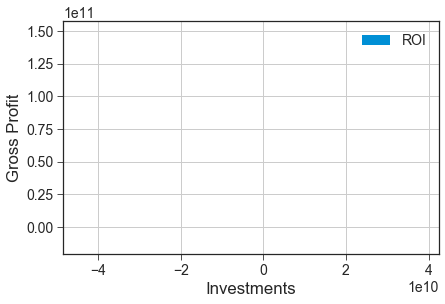

In [94]:
plt.bar(x,y,label = "ROI")

plt.xlabel("Investments")
plt.ylabel("Gross Profit")
plt.grid(True)
plt.legend()
plt.show()

In [13]:


lr=linear_model.LinearRegression()
pred=lr.fit(X=nyc_data[[ 'Accounts Payable','Accounts Receivable',  'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
       'Net Income Applicable to Common Shareholders',
       'Net Income-Cont. Operations', 'Net Receivables', 'Non-Recurring Items',
       'Operating Income', 'Operating Margin', 'Other Assets',
       'Other Current Assets', 'Other Current Liabilities', 'Other Equity',
       'Other Financing Activities', 'Other Investing Activities',
       'Other Liabilities', 'Other Operating Activities',
       'Other Operating Items', 'Pre-Tax Margin', 'Pre-Tax ROE',
       'Profit Margin', 'Quick Ratio', 'Research and Development',
       'Retained Earnings', 'Sale and Purchase of Stock',
       'Sales, General and Admin.',
       'Short-Term Debt / Current Portion of Long-Term Debt',
       'Short-Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Equity', 'Total Liabilities',
       'Total Liabilities & Equity', 'Total Revenue', 'Treasury Stock',
       'For Year',  'Estimated Shares Outstanding']], y= nyc_data['Earnings Per Share'])
pred

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
X=X=nyc_data[[ 'Accounts Payable','Accounts Receivable',  'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
       'Net Income Applicable to Common Shareholders',
       'Net Income-Cont. Operations', 'Net Receivables', 'Non-Recurring Items',
       'Operating Income', 'Operating Margin', 'Other Assets',
       'Other Current Assets', 'Other Current Liabilities', 'Other Equity',
       'Other Financing Activities', 'Other Investing Activities',
       'Other Liabilities', 'Other Operating Activities',
       'Other Operating Items', 'Pre-Tax Margin', 'Pre-Tax ROE',
       'Profit Margin', 'Quick Ratio', 'Research and Development',
       'Retained Earnings', 'Sale and Purchase of Stock',
       'Sales, General and Admin.',
       'Short-Term Debt / Current Portion of Long-Term Debt',
       'Short-Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Equity', 'Total Liabilities',
       'Total Liabilities & Equity', 'Total Revenue', 'Treasury Stock',
       'For Year',  'Estimated Shares Outstanding']]
y= nyc_data['Earnings Per Share']

In [129]:
import statsmodels.api as smi

model=smi.OLS(X, y)
res=model.fit()
print(res.summary())

ValueError: shapes (1299,74) and (1299,74) not aligned: 74 (dim 1) != 1299 (dim 0)

In [15]:
print("RSQ =",pred.score(X,y))

RSQ = 0.45906847682266416


In [16]:

    print("coefficients =", pred.coef_)
    
        

coefficients = [-2.38519461e-07  5.07142941e-10 -6.37507999e-04  2.37683551e-08
  1.18330013e-10  1.28954106e-02 -1.07594662e-09 -1.38921841e-10
  8.43269018e-11 -4.14378866e-10 -7.76040554e-04 -6.97027445e-09
 -1.06106355e-09 -6.39862178e-11 -9.75385413e-09  1.07616011e-08
 -1.77828785e-09  1.64419676e-10 -6.97246960e-09 -6.97989075e-09
  1.09292085e-02 -5.73691939e-10 -1.75217562e-09 -6.95479275e-09
  8.59942438e-09 -8.05270516e-10  2.39140263e-08  1.92412311e-10
 -1.20322698e-09 -7.12019868e-09 -1.29766648e-09 -5.87145974e-10
  8.01957534e-11 -6.06157183e-10  2.53416360e-10  5.64759895e-10
 -2.32230347e-08  6.27884354e-09  4.54342298e-10 -4.80443059e-09
 -1.01443750e-09 -7.66354179e-10 -2.64906600e-10  4.13438725e-10
 -7.20313971e-02 -6.94547508e-09 -8.26111606e-10 -2.38561251e-07
  1.27033520e-10 -2.66429930e-11  2.38767426e-08 -1.19939121e-09
  4.19111455e-10  1.82570927e-10  3.21587840e-02  4.35716465e-04
 -4.38308268e-03 -8.27116201e-03 -9.83894781e-11  8.61688134e-11
 -6.140138

In [17]:
print("intercept = ", pred.intercept_)

intercept =  -3.57478844552647


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size =0.55)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(584, 74) (715, 74)
(584,) (715,)


In [115]:
lm=linear_model.LinearRegression()

model=lm.fit(X_train, y_train)
predictions=lm.predict(X_test)
print(model.score(X_test,y_test))
print("Train_Accuracy=" ,model.score)

-0.6051637663362308
Train_Accuracy= <bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [117]:
X_train

Accounts Payable  Accounts Receivable  After Tax ROE  \
861       2.663000e+08        -7.920000e+07           14.0   
180       5.209000e+08        -4.610000e+07           16.0   
1198      1.363000e+09         2.900000e+07            1.0   
979       5.327000e+09         0.000000e+00           14.0   
762       9.473000e+09        -8.100000e+07           68.0   
...                ...                  ...            ...   
1689      7.570000e+08        -2.400000e+07           16.0   
1757      7.750000e+08         2.000000e+06           14.0   
1219      5.282000e+09         1.431000e+09           32.0   
698       2.242000e+09         1.620000e+08            7.0   
865       1.842000e+09        -4.200000e+07           36.0   

      Capital Expenditures  Capital Surplus  Cash Ratio  \
861          -8.100000e+07     3.429800e+09       317.0   
180          -5.650000e+07     7.971000e+08       145.0   
1198         -3.080000e+08     1.243300e+10        92.0   
979          -1.211000e+09     2.600000e+07         9.0   
762          -1.442000e+09     8.885000e+09        15.0   
...                    ...              ...         ...   
1689         -3.210000e+08     0.000000e+00        64.0   
1757         -1.120000e+08     1.706000e+09        65.0   
1219         -5.272000e+09     7.640000e+09        64.0   
698          -1.250000e+09     1.335200e+10       163.0   
865          -2.840000e+08     1.135000e+09       130.0   

      Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
861                7.146000e+08             -10700000.0   0.000000e+00   
180                7.568000e+08             -15100000.0   5.000000e+05   
1198               1.951000e+09              18000000.0   6.000000e+06   
979                5.410000e+08            -244000000.0   5.550000e+08   
762                1.723000e+09            -124000000.0   8.800000e+07   
...                         ...                     ...            ...   
1689               4.730000e+08             -11000000.0   2.933000e+09   
1757               5.040000e+08               5000000.0   2.000000e+06   
1219               4.394000e+09             -24000000.0   1.780000e+08   
698                4.500000e+09             -77000000.0   8.400000e+08   
865                3.090000e+09              25000000.0   6.000000e+06   

      Cost of Revenue  Current Ratio  Deferred Asset Charges  \
861      8.065000e+08          446.0            1.678000e+08   
180      1.561100e+09          271.0            3.500000e+06   
1198     0.000000e+00          190.0            2.190000e+08   
979      3.319400e+10          127.0            0.000000e+00   
762      5.478700e+10          136.0            0.000000e+00   
...               ...            ...                     ...   
1689     1.031300e+10          147.0            1.000000e+08   
1757     2.289000e+09          240.0            0.000000e+00   
1219     5.804000e+09          137.0            0.000000e+00   
698      5.458000e+09          294.0            2.056000e+09   
865      7.888000e+09          284.0            3.460000e+08   

      Deferred Liability Charges  Depreciation  \
861                 0.000000e+00  8.950000e+07   
180                 3.170000e+07  4.580000e+07   
1198                1.660000e+08  4.980000e+08   
979                 1.170000e+09  1.623000e+09   
762                 6.420000e+08  1.786000e+09   
...                          ...           ...   
1689                6.400000e+08  4.990000e+08   
1757                1.730000e+08  1.420000e+08   
1219                5.362000e+09  4.544000e+09   
698                 0.000000e+00  1.184000e+09   
865                 2.560000e+08  4.770000e+08   

      Earnings Before Interest and Tax  Earnings Before Tax  \
861                       7.585000e+08         7.585000e+08   
180                       3.751000e+08         3.436000e+08   
1198                      5.520000e+08         5.520000e+08   
979                       3.137000e+09   

Text(0.5, 1.0, 'Actual Vs Predicted Values')

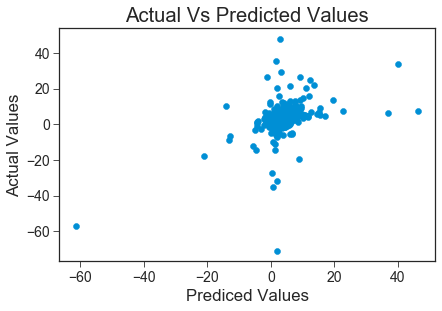

In [110]:
plt.scatter(y_test,predictions)
plt.xlabel("Prediced Values")
plt.ylabel("Actual Values")
plt.title("Actual Vs Predicted Values")

AttributeError: 'function' object has no attribute 'summary'